<a href="https://colab.research.google.com/github/Gcarmnonapy7/IBM-Machine-Learning-with-Python-Scikit-learn-Professional-Certificate/blob/main/IBM_Machine_Learning_with_Python_%26_Scikit_learn_Professional_Certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from google.colab import files
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file = files.upload()

Saving archive(3).zip to archive(3) (1).zip


In [24]:
raw_path = '/content/earthquake_data_tsunami.csv'

In [25]:
def unzip_file(file_path):
  if not file_path or file_path == ' ':
    return None
  with ZipFile(file_path,'r') as f:
    data = f.extractall()
  return data

In [26]:
unzip_file('/content/archive(3).zip')

In [27]:
data = pd.read_csv(raw_path)
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [29]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [30]:
def isnull_percent(data:pd.DataFrame):

  null_sum = data.isnull().sum()
  total = len(data)
  null_percent = (null_sum / total ) * 100
  print('=== Null percent ===')
  print('=' * 50)
  print(f'{null_percent}')
  print('=' * 50)

In [31]:
isnull_percent(data)

=== Null percent ===
magnitude    0.0
cdi          0.0
mmi          0.0
sig          0.0
nst          0.0
dmin         0.0
gap          0.0
depth        0.0
latitude     0.0
longitude    0.0
Year         0.0
Month        0.0
tsunami      0.0
dtype: float64


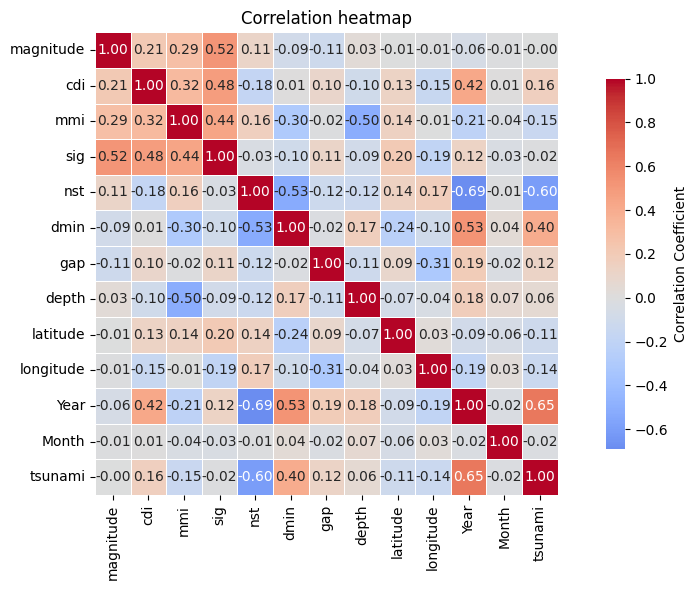

In [36]:
def heatmap_corr(data:pd.DataFrame,figsize=(10,6),cmap='coolwarm',method='pearson'):
  ''''''
  corr = data.corr()

  plt.figure(figsize=figsize)
  sns.heatmap(
        corr,
        annot=True,          # Show correlation values
        fmt='.2f',           # Format to 2 decimals
        cmap=cmap,
        center=0,            # Center color around 0
        square=True,
        linewidths=0.5,
        cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
    )
  plt.title('Correlation heatmap')
  plt.tight_layout()
  plt.show()

heatmap_corr(data=data)

In [33]:
#sns.lineplot(data=data_init,y='tsunami',x='Year')

In [37]:
# --- Statistical features ---

def features_statistical(data):
  df = data.copy()

  numerical_columns = df.select_dtypes(include='number').columns
  categorical_columns = df.select_dtypes(include='categorical').columns

  for col in numerical_columns :
    pass
